In [154]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [155]:
pwd

'C:\\Users\\KIIT'

In [156]:
titanic = pd.read_csv(r'C:\Users\KIIT\Desktop\New folder\machine-learning-master\projects\titanic_survival_exploration\titanic_data.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [157]:
titanic.shape

(891, 12)

In [158]:
titanic.describe()
#titanic.describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

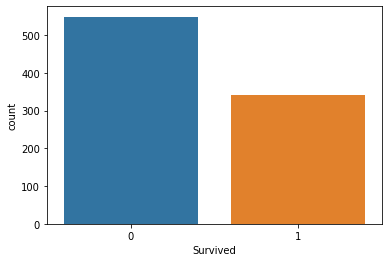

In [160]:
sns.countplot(titanic["Survived"])

In [161]:
Sex_ratio = titanic.pivot_table(index = "Sex" , values = "Survived")
Sex_ratio

,Survived
Sex,
female,0.742038
male,0.188908


In [162]:
Pclass_ratio = titanic.pivot_table(index = "Pclass" , values = "Survived")
Pclass_ratio

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [163]:
Pclass_sex = titanic.pivot_table("Survived",index = "Sex" ,columns='Pclass')
Pclass_sex

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


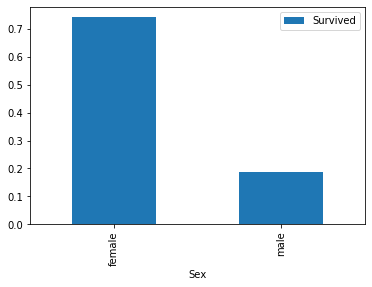

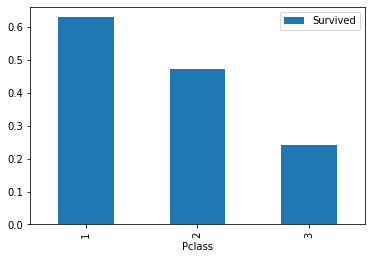

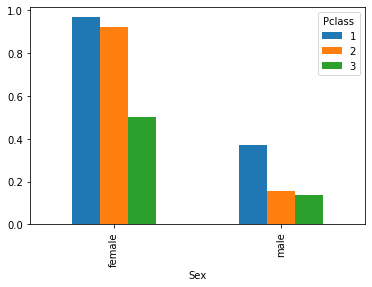

In [164]:
Sex_ratio.plot.bar()
Pclass_ratio.plot.bar()
Pclass_sex.plot.bar()

In [165]:
#Count the empty (NaN, NAN, na) values in each column 
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
#Drop Cabin as it has too many NaN values
titanic=titanic.drop(columns=["Cabin"])
titanic=titanic.drop(columns=["PassengerId"])
titanic=titanic.drop(columns=["Name"])
titanic=titanic.drop(columns=["Ticket"])
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [167]:
#Fill the NaN values of "Age" coulmn with it's maean values
titanic['Age'].fillna((titanic['Age'].mean()), inplace = True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [168]:
#Remove the rows with missing values
titanic = titanic.dropna(subset = ["Embarked"])
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [169]:
titanic.shape

(889, 8)

In [170]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [171]:
#Print the unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [172]:
#Encoding categorical data values (Transforming object data types to integers)
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
titanic['Sex']= le.fit_transform(titanic['Sex']) 
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [174]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

In [175]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [176]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [178]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [179]:
#Get and train all of the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.819971870604782
[1]K Nearest Neighbor Training Accuracy: 0.8776371308016878
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8073136427566807
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8593530239099859
[4]Gaussian Naive Bayes Training Accuracy: 0.8157524613220816
[5]Decision Tree Classifier Training Accuracy: 0.9845288326300985
[6]Random Forest Classifier Training Accuracy: 0.9676511954992968


In [181]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

[[84 21]
 [30 43]]
Model[0] Testing Accuracy = "0.7134831460674157 !"

[[86 19]
 [32 41]]
Model[1] Testing Accuracy = "0.7134831460674157 !"

[[85 20]
 [30 43]]
Model[2] Testing Accuracy = "0.7191011235955056 !"

[[89 16]
 [29 44]]
Model[3] Testing Accuracy = "0.7471910112359551 !"

[[79 26]
 [26 47]]
Model[4] Testing Accuracy = "0.7078651685393258 !"

[[87 18]
 [27 46]]
Model[5] Testing Accuracy = "0.7471910112359551 !"

[[91 14]
 [27 46]]
Model[6] Testing Accuracy = "0.7696629213483146 !"



In [182]:
#Get the importance of the features
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Fare,0.279
Age,0.277
Sex,0.231
Pclass,0.071
SibSp,0.056
Parch,0.046
Embarked,0.040


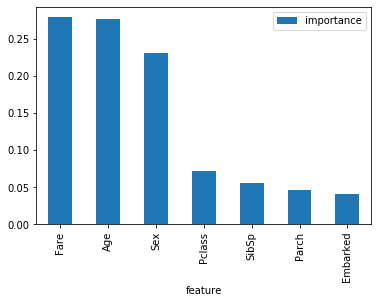

In [183]:
#Visualize the importance
importances.plot.bar()

In [ ]:
##
###
####
#####
#https://medium.com/better-programming/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16
####
###
##
#